In [1]:
%matplotlib inline   
                     # this sets up matplotlib to make plots show up in the notebook
import numpy as np   # imports the numpy package, abbreviated as np
import matplotlib    # imports the matplotlib package for making plots
import matplotlib.pyplot as plt    # imports the part of matplotlib we use most,
                                   #abbreviated as plt
import scipy.stats as stats
import astropy.stats as astats
import numpy.random as random

# Results when averaging data together

In [2]:
nsims=int(1E5)
navg=100
data=random.randn(nsims,navg)

# average each set of navg values
means=np.mean(data,axis=1)

- Using the below code block, __plot a histogram of the distribution of the means from each simulation, with binsize 0.01, over the range from -2 to +2 (what should you set the `bins` and `range` keywords to be for that?)__

- __Determine the standard deviation of the array of means.__

In [ ]:
# done in lecture 9 notebook

- Now, in the same code box, also __create a second set of simulations with `navg` = 9.  Plot the histogram of averaging the results from these simulations on top of the histogram for averaging 100 measurements, and calculate the standard deviation of the new array of means.__



- __Discuss with your group: How do you explain the differences between the results (both qualitatively and quantitatively)? How does the scatter of the means scale with `navg`?__

In [ ]:
# done in lecture 9 notebook

In [ ]:
# done in lecture 9 notebook

# Determining the Asymptotic Relative Efficiency of the median

__Run the code in the below box repeatedly; what is the ratio of standard deviations of the medians vs. the means?__  

__Discuss with your group: What does this imply about the sample size needed for the standard deviation of the median to match the standard deviation of the mean?__

In [3]:
nsims=int(1E4)
navg=int(5E3)
data=random.randn(nsims,navg)
means=np.mean(data,axis=1)
medians=np.median(data,axis=1)

print(f'std. dev. of the means: {np.std(means,ddof=1):.4f}')
print(f'std. dev. of the medians: {np.std(medians,ddof=1):.4f}')

print(f'ratio of std. devs.: {np.std(medians,ddof=1)/ np.std(means,ddof=1):.4f}')

std. dev. of the means: 0.0141
std. dev. of the medians: 0.0179
ratio of std. devs.: 1.2617


# Examples of applying robust statistics

For convenience, let's define two functions: `hlmean` and `mode2`.

In [4]:

def hlmean(data,nsamp=-1):
    # PURPOSE:
    #
    #  Calculate Hodges-Lehmann estimator of mean, using nsamp
    #   bootstraps from the data
    #
    # The Hodges-Lehmann estimator is, formally, the median value of
    #  (x_i+x_j)/2 over all pairs of indices i,j .
    # Here, we estimate that quantity using nsamp randomly chosen values
    # of i & j, rather than using all possible values.
    #
    # Although it has much of the robustness of an ordinary median, the
    # H-L estimator yields much smaller errors (equivalent to the mean of
    # >96% as much data, while the median has errors equivalent to the
    # standard error of 64% as much data).
    #
    # CALLING SEQUENCE:
    #
    #  result=hlmean(data [,nsamp=nsamp])
    #
    # INPUTS:
    #
    #  data: array of values to calculate the H-L mean of
    #
    # OPTIONAL KEYWORD PARAMETERS:
    #
    #  nsamp= : if set, hlmean will use this number of bootstrap
    #  samples to do the calculation.  If not set, it will use a number of random pairs equal to
    #  50 times the number of elements of the data array
    #
    # OUTPUTS:
    #
    #  result: sampling-derived estimate of the H-L mean estimator
    #
    # EXAMPLE:
    #    test=[1,2,0,1,2,20.]
    #    print hlmean(test)
    
    ndata=len(data)
    
    # if the number of samples has not been provided, set it to 50*the size of the data array
    
    if nsamp < 0:
        nsamp=50.*ndata
    nsamp=int(nsamp)

# create resampled version of original data
    newdata = np.random.choice(data,size=(nsamp,2))
    
    # average x1 + x2 from each random draw
    mn = (newdata[:,0]+newdata[:,1])/2.
    
    # calculate the median of the averages 
    # this is HL estimator 
    return(np.median(mn))


In [5]:
def mode2(data,**kwargs):
# note: provide bins and (optionally) range keywords to not use
# defaults of np.histogram (10 bins, full range)
    counts,edges=np.histogram(data,**kwargs)
    whmax=np.argmax(counts)
    mode=(edges[whmax]+edges[whmax+1])/2
    return(mode)

## Trying different statistics for location

Now, let's generate $10^5$ values from a standard normal distribution, and compare various statistics for the location of the sample.  __What value do you expect here?  Which statistics come closest? Compare results with your neighbors!__

In [11]:
ndata=int(1E5)
data=random.randn(ndata)


In [ ]:
print(f'Mean: {data.mean():.4f}')
print(f'Median: {np.median(data):.4f}')
print(f'Mode: {mode2(data,bins=np.linspace(-10,10,2001)):.4f}')
print(f'H-L mean: {hlmean(data):.4f}')
print()

limits=np.percentile(data,(10,90))
print(f'10% Trimmed mean: {stats.tmean(data,limits=limits):.4f}')

clipped_data,low_threshold,high_threshold =  \
    stats.sigmaclip(data,low=3.,high=3.)

print(f'Sigma-clipped: {np.mean(clipped_data):.4f}')

print()
winsor_data = stats.mstats.winsorize(data,limits=(.1,.1))
print(f'Winsorized: {np.mean(winsor_data):.4f}')
print(f'Biweight: {astats.biweight_location(data):.4f}')

Mean: 0.0003
Median: 0.0012
Mode: 0.0650
H-L mean: 0.0007

10% Trimmed mean: 0.0005
Sigma-clipped: -0.0006

Winsorized: 0.0003
Biweight: 0.0005


## Trying different statistics for scale

Now, let's generate $10^5$ values from a standard normal distribution, and compare various statistics for the scale (e.g., standard deviation) of the sample.  __What value do you expect here?  Which statistics come closest? Compare results with your group!__

In [13]:
ndata=int(5E5)
data=random.randn(ndata)

In [14]:
# note the need for correction factors to get estimates
# of the Gaussian sigma!

# the standard...
print(f'Standard deviation: {data.std():.4f}')

# average absolute deviation
normavgabsdev = np.mean(np.abs(data-data.mean()))/0.7979
print(f'Normalized Mean Absolute Deviation: {normavgabsdev:.5f}')

# median absolute deviation
# we coded this by hand before, but it's also available in scipy.stats
# including option to scale to sigma equivalent
normmad = stats.median_abs_deviation(data,scale='normal')
print(f'Normalized Median Absolute Deviation: {normmad:.5f}')

# IQR
# we did this with np.percentile before, 
# but it's also available in scipy.stats
# including option to scale to sigma equivalent
normiqr = stats.iqr(data,scale='normal')
print(f'Normalized IQR: {normiqr:.5f}')

print()

# 10% Trimmed standard deviation
# Note: here and below, the scale factors for normalization were determined
# just by calculating statistics for samples with very large N
limits=np.percentile(data,(10,90))
print(f'10% Trimmed Standard Deviation: {stats.tstd(data,limits=limits):.4f}')
print(f'Norm. 10% Trimmed Standard Deviation: {stats.tstd(data,limits=limits)*1.51:.4f}')
print()


# 10% winsorized standard deviation
winsor_data = stats.mstats.winsorize(data,limits=(.1,.1))
print(f'Winsorized standard deviation: {np.std(winsor_data):.4f}')
print(f'Norm. Winsorized standard deviation: {np.std(winsor_data)*1.21:.4f}')
print()

# note that the scale factor needed is smaller if we winsorize rather than trim


# 3-sigma-clipped standard deviation
clipped_data,low_threshold,high_threshold = stats.sigmaclip(data,low=3.,high=3.)

print(f'Sigma-clipped standard deviation: {np.std(clipped_data):.4f}')
print(f'Norm. Sigma-clipped standard deviation: {np.std(clipped_data)*1.015:.4f}')
print()



# biweight standard deviation
print(f'Biweight standard deviation: {np.sqrt(astats.biweight_midvariance(data)):.4f}')
print(f'Norm. Biweight standard deviation: {np.sqrt(astats.biweight_midvariance(data))*0.99:.4f}')




Standard deviation: 1.0007
Normalized Mean Absolute Deviation: 1.00128
Normalized Median Absolute Deviation: 1.00358
Normalized IQR: 1.00368

10% Trimmed Standard Deviation: 0.6632
Norm. 10% Trimmed Standard Deviation: 1.0015

Winsorized standard deviation: 0.8253
Norm. Winsorized standard deviation: 0.9986

Sigma-clipped standard deviation: 0.9857
Norm. Sigma-clipped standard deviation: 1.0005

Biweight standard deviation: 1.0104
Norm. Biweight standard deviation: 1.0003


# Doing a more complicated Monte Carlo

Consider a mixture of two Gaussians: a fraction  $(1-f_{outlier})$  of objects are distributed as $N(3150,930^2)$, and a fraction $f_{outlier}$ are distributed as $N(4750,200^2)$.  We can implement this by randomly selecting objects as outliers with probability $f_{outlier}$, and assigning random values according to whether they are an outlier or not.

In [10]:
nsims=int(5E4)
ndata=100
foutlier=0.1

isoutlier=random.rand(nsims,ndata) < foutlier

fakedata=(1-isoutlier)*(random.randn(nsims,ndata)*930.+3150) \
+ (isoutlier)*(random.randn(nsims,ndata)*200.+4750)

__In the code box below, plot a histogram of the full set of fake data; and then choose one single simulation and plot the histogram for it. Use a bin size of 100 km/s.__  

__Note__: To plot histograms of a multi-dimensional array, use `np.ravel(arrayname)`, not just `arrayname`, in the call to `plt.hist`.  That routine causes Python to treat the array as one-dimensional.  

(array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0001,
        0.0002, 0.0002, 0.    , 0.0001, 0.    , 0.0001, 0.0004, 0.0003,
        0.    , 0.0002, 0.0006, 0.0001, 0.0004, 0.0003, 0.0001, 0.0004,
        0.0001, 0.0002, 0.0002, 0.0006, 0.0004, 0.0004, 0.0004, 0.0002,
        0.0005, 0.0007, 0.0002, 0.0002, 0.    , 0.0003, 0.0001, 0.0002,
        0.0003, 0.0002, 0.0001, 0.0002, 0.0004, 0.0002, 0.0002, 0.    ,
        0.    , 0.0002, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    ]),
 array([-2000., -1900., -1800., -1700., -1600., -1500., -1400., -1300.,
        -1200., -1100., -1000.

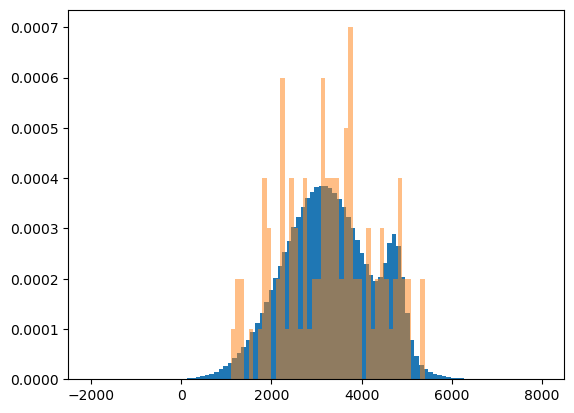

In [25]:
plt.hist(np.ravel(fakedata),bins=np.linspace(-2000,8000,100),density=True)
plt.hist(np.ravel(fakedata[3,:]),bins=np.arange(-2000,8000,100),alpha=0.5,label='one single simulation',density=True)

# Interpreting error estimates

Frequentist statistics focuses on what will be observed, given an assumed truth.  Let's consider two possible interpretations:

- 68.3% of the time we do an experiment like this, the true mean will lie between $m-\hat{\sigma_{<x>}}$ and $m+\hat{\sigma_{<x>}}$, where $m$ is the observed mean and $\hat{\sigma_{<x>}}$ is the sample standard deviation of the mean determined from the data, as $\sigma_x \over \sqrt{n}$; or
- 68.3% of the time we do an experiment like this, the true mean will lie between $m-{\sigma_{<x>}}$ and $m+{\sigma_{<x>}}$, where $\sigma_{{<x>}}$ is the standard error we would calculate with perfect knowledge of the distribution, as $\sigma \over \sqrt{n}$.

Let's test this out with simulations of measuring the mean of 10 or 100 measurements drawn from $N(0,1)$.

In [27]:
# simulating averaging 10 measurements, 100_000 times
nsims=int(1E5)
ndata=10
data=random.randn(nsims,ndata) 

means = np.mean(data,axis = 1)  # mean of each set of 10 measurements
sample_std=np.std(data,axis = 1)    # standard deviation of each set of 10 measurements. 
# Note that the axis= keyword works with np.std! Do ?np.std for details.

# sample standard errors determined from each random dataset
sample_serr=sample_std/np.sqrt(ndata) 

# standard error calculated knowing the actual distribution has sigma=1
true_serr=1/np.sqrt(ndata)        

__Using the below code box, plot the histograms of `means` and `sample_std` (as separate figures).  Are they both Normally distributed (Gaussian)?__


(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 6.000e+00,
        6.000e+00, 1.600e+01, 2.100e+01, 1.300e+01, 1.600e+01, 3.200e+01,
        3.800e+01, 5.200e+01, 9.500e+01, 1.090e+02, 1.410e+02, 1.930e+02,
        2.310e+02, 2.760e+02, 3.490e+02, 4.200e+02, 4.670e+02, 5.690e+02,
        7.000e+02, 8.540e+02, 1.012e+03, 1.223e+03, 1.393e+03, 1.580e+03,
        1.819e+03, 1.986e+03, 2.169e+03, 2.371e+03, 2.621e+03, 2.863e+03,
        2.976e+03, 3.245e+03, 3.542e+03, 3.476e+03, 3.703e+03, 3.768e+03,
        3.724e+03, 3.736e+03, 3.858e+03, 3.659e+03, 3.677e+03, 3.531e+03,
        3.516e+03, 3.277e+03, 3.000e+03, 2.845e+03, 2.699e+03, 2.395e+03,
        2.162e+03, 1.902e+03, 1.702e+03, 1.591e+03, 1.330e+03, 1.258e+03,
        1.058e+03, 9.120e+02, 7.340e+02, 5.940e+02, 4.970e+02, 4.040e+02,
        3.500e+02, 2.710e+02, 2.610e+02, 1.690e+02, 1.220e+02, 9.400e+01,
        7.300e+01, 6.100e+01, 5.200e+0

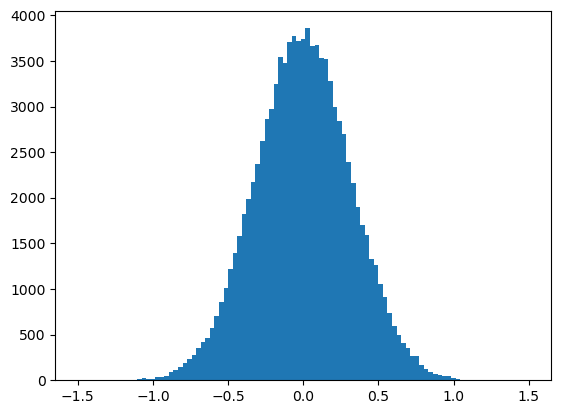

In [30]:
plt.hist(means,bins=np.linspace(-1.5,1.5,100))

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 3.000e+00,
        7.000e+00, 1.400e+01, 2.200e+01, 1.900e+01, 5.500e+01, 8.200e+01,
        1.010e+02, 1.230e+02, 1.810e+02, 2.440e+02, 3.270e+02, 4.180e+02,
        5.290e+02, 6.240e+02, 7.610e+02, 8.960e+02, 1.078e+03, 1.311e+03,
        1.492e+03, 1.751e+03, 2.030e+03, 2.194e+03, 2.461e+03, 2.587e+03,
        2.890e+03, 3.095e+03, 3.089e+03, 3.274e+03, 3.415e+03, 3.496e+03,
        3.561e+03, 3.478e+03, 3.592e+03, 3.633e+03, 3.574e+03, 3.544e+03,
        3.407e+03, 3.263e+03, 3.117e+03, 2.974e+03, 2.795e+03, 2.535e+03,
        2.378e+03, 2.297e+03, 2.036e+03, 1.902e+03, 1.738e+03, 1.636e+03,
        1.292e+03, 1.310e+03, 1.081e+03, 9.700e+02, 8.340e+02, 7.080e+02,
        6.100e+02, 5.380e+02, 4.420e+02, 3.890e+02, 3.430e+02, 2.610e+02,
        2.240e+02, 1.900e+02, 1.540e+02, 1.290e+02, 1.060e+02, 7.000e+01,
        6.900e+01, 5.500e+01, 4.000e+0

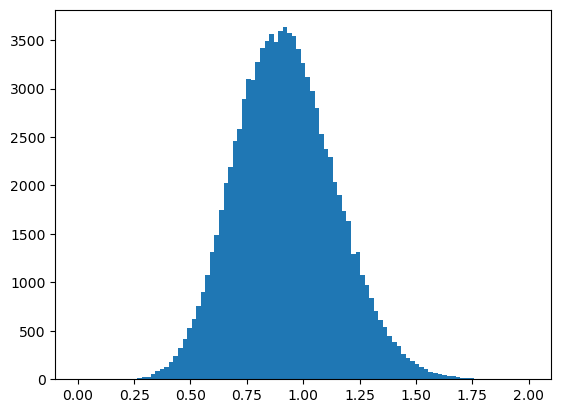

In [31]:
plt.hist(sample_std, bins=np.linspace(0,2,100))

__In the below code box, write code to determine:__


- What fraction of the time when we do an experiment like this does the true mean lie between `means-sample_serr` and `means+sample_serr`?

- What fraction of the times when we do an experiment like this does the true mean lie between `means-true_serr` and `means+true_serr`?

Recall: 68.3% of the time a normally-distributed value will be within 1 sigma of the mean.  __Which matches this?__

In [43]:
means + sample_serr

array([0.23348137, 0.09676072, 0.29513974, ..., 0.07237407, 0.11403035,
       0.21863192], shape=(100000,))

In [44]:
means - sample_serr

array([ 0.03103967, -0.09331576,  0.08890477, ..., -0.11383395,
       -0.08476084,  0.04109028], shape=(100000,))

In [49]:
print(np.sum(np.where(np.logical_and(( 0 < means + sample_serr),( 0 > means - sample_serr)),1,0))/nsims)


0.67844


In [51]:
print(np.sum(np.where(np.logical_and(( 0 < means + true_serr),( 0 > means - true_serr)),1,0))/nsims)

0.68257


In [52]:
print(np.sum(np.logical_and(( 0 < means + true_serr),( 0 > means - true_serr)))/nsims) 

0.68257


In [ ]:
# the true standard deviation matched this 

In [54]:
# Now, do the same for simulations of averaging 100 measurements

nsims=int(1E5)
ndata=100
data=random.randn(nsims,ndata)   
means = np.mean(data,axis = 1)  # mean of each set of 10 measurements
sample_std=np.std(data,axis = 1)    # standard deviation of each set of 10 measurements. 
# Note that the axis= keyword works with np.std! Do ?np.std for details.

# sample standard errors determined from each random dataset
sample_serr=sample_std/np.sqrt(ndata) 

# standard error calculated knowing the actual distribution
true_serr=1/np.sqrt(ndata)        

(array([0.000e+00, 0.000e+00, 2.000e+00, 4.000e+00, 3.000e+00, 7.000e+00,
        9.000e+00, 1.400e+01, 1.300e+01, 1.500e+01, 1.700e+01, 2.200e+01,
        4.300e+01, 4.100e+01, 6.500e+01, 7.100e+01, 7.900e+01, 1.200e+02,
        1.440e+02, 1.500e+02, 2.250e+02, 2.750e+02, 2.960e+02, 3.470e+02,
        4.060e+02, 5.100e+02, 6.090e+02, 6.410e+02, 7.660e+02, 8.930e+02,
        9.510e+02, 1.115e+03, 1.284e+03, 1.414e+03, 1.565e+03, 1.711e+03,
        1.902e+03, 2.013e+03, 2.198e+03, 2.299e+03, 2.475e+03, 2.554e+03,
        2.799e+03, 2.897e+03, 3.039e+03, 3.053e+03, 3.027e+03, 3.241e+03,
        3.054e+03, 3.318e+03, 3.261e+03, 3.159e+03, 3.096e+03, 3.059e+03,
        2.964e+03, 2.827e+03, 2.658e+03, 2.627e+03, 2.505e+03, 2.314e+03,
        2.130e+03, 1.992e+03, 1.857e+03, 1.714e+03, 1.545e+03, 1.367e+03,
        1.287e+03, 1.103e+03, 9.780e+02, 8.410e+02, 7.690e+02, 6.690e+02,
        5.830e+02, 5.170e+02, 4.240e+02, 3.490e+02, 3.150e+02, 2.360e+02,
        2.330e+02, 1.870e+02, 1.310e+0

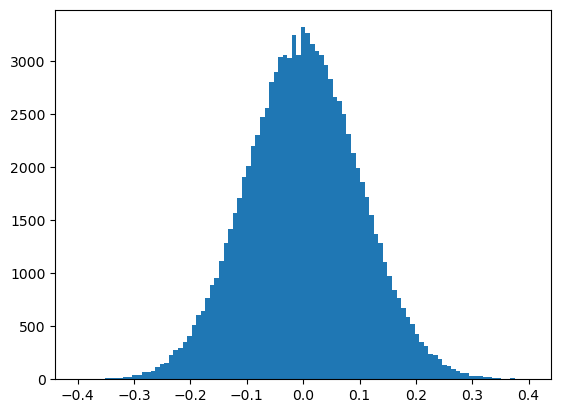

In [55]:
plt.hist(means, bins = np.linspace(-0.4,0.4,100))

(array([0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 5.000e+00, 1.000e+00,
        5.000e+00, 6.000e+00, 1.400e+01, 1.800e+01, 3.200e+01, 4.100e+01,
        6.700e+01, 7.900e+01, 8.500e+01, 1.150e+02, 1.480e+02, 2.020e+02,
        2.510e+02, 3.370e+02, 4.150e+02, 5.610e+02, 7.100e+02, 8.090e+02,
        1.007e+03, 1.189e+03, 1.337e+03, 1.521e+03, 1.749e+03, 1.969e+03,
        2.188e+03, 2.619e+03, 2.885e+03, 2.962e+03, 3.248e+03, 3.374e+03,
        3.583e+03, 3.789e+03, 3.799e+03, 3.970e+03, 4.113e+03, 3.985e+03,
        3.876e+03, 3.742e+03, 3.791e+03, 3.578e+03, 3.464e+03, 3.227e+03,
        3.012e+03, 2.777e+03, 2.622e+03, 2.308e+03, 2.096e+03, 1.979e+03,
        1.651e+03, 1.380e+03, 1.222e+03, 1.098e+03, 9.300e+02, 7.710e+02,
        6.800e+02, 5.280e+02, 4.500e+02, 3.590e+02, 2.620e+02, 2.120e+02,
        1.860e+02, 1.690e+02, 1.060e+02, 8.400e+01, 5.700e+01, 5.400e+01,
        4.000e+01, 2.600e+01, 2.200e+01, 1.700e+01, 6.000e+00, 7.000e+00,
        4.000e+00, 3.000e+00, 3.000e+0

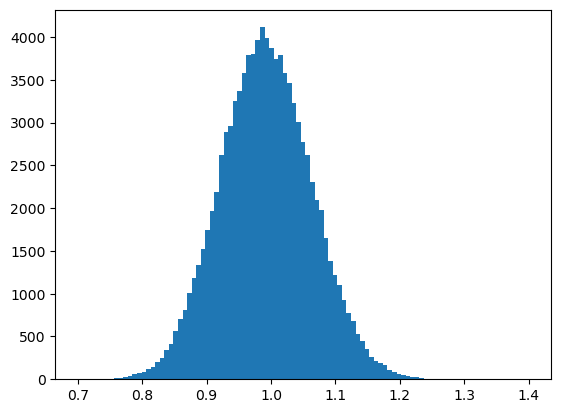

In [56]:
plt.hist(sample_std, bins = np.linspace(0.7,1.4,100))

In [57]:
print(np.sum(np.where(np.logical_and(( 0 < means + sample_serr),( 0 > means - sample_serr)),1,0))/nsims)

0.6762


In [58]:
print(np.sum(np.where(np.logical_and(( 0 < means + true_serr),( 0 > means - true_serr)),1,0))/nsims)

0.68069


# Calculating proper confidence intervals

We can use the `cdf` method of an object from the `stats.t` class to calculate how much probability we expect to lie between `means-sample_serr` and `means+sample_serr`, for the two scenarios we looked at (10 data points = 9 degrees of freedom, 100 = 99 DOF).  __Compare to the results from your Monte Carlo simulations.__

In [59]:
print(stats.t.cdf(1.,9)-stats.t.cdf(-1.,9))
print(stats.t.cdf(1.,99)-stats.t.cdf(-1.,99))

0.6565636038620863
0.6802515258606983


We can use the `ppf` method of an object from the `stats.t` class to calculate the $t$ value such that the CDF is 0.8413 (i.e., the upper edge of a 68.3% confidence interval).  Because the t distribution is symmetric, the lower edge will just be opposite  in sign but have the same absolute value.  __Let's calculate these cutoffs and test that the resulting intervals in fact contain 68.3% of the probability:__

In [60]:
cutoff9 = stats.t.ppf(0.8413,9)
cutoff99 = stats.t.ppf(0.8413,99)

print(f'9  DOF: Cutoff value: {cutoff9:.4f}')
print(f'        Probability contained: {stats.t.cdf(cutoff9,9)-stats.t.cdf(-cutoff9,9):.4f}')
print(f'99 DOF: Cutoff value: {cutoff99:.4f}')
print(f'        Probability contained: {stats.t.cdf(cutoff99,99)-stats.t.cdf(-cutoff99,99):.4f}')

9  DOF: Cutoff value: 1.0585
        Probability contained: 0.6826
99 DOF: Cutoff value: 1.0049
        Probability contained: 0.6826


How much difference does the difference between a $t$ distribution and a Gaussian make, as a function of the amount of data we have and which confidence interval we are looking at?  __Evaluate how close the cutoffs are to those for a Gaussian distribution, as a function of the number of degrees of freedom, for 68%, 95%, and 99% confidence intervals.__

In [61]:
print('68% range limits:')

for i in np.arange(2,20,2): 
    print(f'DOF: {i:2d}   {stats.t.ppf(0.1587,i-1):.5f}, {stats.t.ppf(0.8413,i-1):5f}')
    
print('\n95% range:')

for i in np.arange(2,20,2): 
    print(f'DOF: {i:2d}   {stats.t.ppf(0.025,i-1):.5f}, {stats.t.ppf(0.975,i-1):5f}')
    
    
print('\n99% range:')
    
for i in np.arange(2,20,2): 
    print(f'DOF: {i:2d}   {stats.t.ppf(0.005,i-1):.5f}, {stats.t.ppf(0.995,i-1):5f}')
          
print('\n large N limits (=cutoffs for a Gaussian distribution):' )
print(f'68%: {stats.t.ppf(1-0.1587,1E7):.5f}')
print(f'95%: {stats.t.ppf(1-0.025,1E7):.5f}')
print(f'99%: {stats.t.ppf(1-0.005,1E7):.5f}')

68% range limits:
DOF:  2   -1.83672, 1.836722
DOF:  4   -1.19662, 1.196616
DOF:  6   -1.11028, 1.110278
DOF:  8   -1.07650, 1.076499
DOF: 10   -1.05852, 1.058520
DOF: 12   -1.04736, 1.047365
DOF: 14   -1.03977, 1.039769
DOF: 16   -1.03427, 1.034265
DOF: 18   -1.03009, 1.030093

95% range:
DOF:  2   -12.70620, 12.706205
DOF:  4   -3.18245, 3.182446
DOF:  6   -2.57058, 2.570582
DOF:  8   -2.36462, 2.364624
DOF: 10   -2.26216, 2.262157
DOF: 12   -2.20099, 2.200985
DOF: 14   -2.16037, 2.160369
DOF: 16   -2.13145, 2.131450
DOF: 18   -2.10982, 2.109816

99% range:
DOF:  2   -63.65674, 63.656741
DOF:  4   -5.84091, 5.840909
DOF:  6   -4.03214, 4.032143
DOF:  8   -3.49948, 3.499483
DOF: 10   -3.24984, 3.249836
DOF: 12   -3.10581, 3.105807
DOF: 14   -3.01228, 3.012276
DOF: 16   -2.94671, 2.946713
DOF: 18   -2.89823, 2.898231

 large N limits (=cutoffs for a Gaussian distribution):
68%: 0.99982
95%: 1.95996
99%: 2.57583


# If you have extra time

- Explore the effect that the number of samples has on the accuracy of `hlmean`.  If you use ndata, 10 $\times$ ndata, 25 $\times$ data, or 100 $\times$ ndata samples, how much does the estimate coming from `hlmean` vary when you rerun it?  You can use e.g. 100 or 1000 values from N(0,1) in testing.

- Apply each of the estimators of location (applied above) on a situation where 10% of values are drawn from N(2,1) instead of N(0,1) (using an foutlier parameter as in the clusters example).  Which estimators appear to be most robust?

